# Crime Analytics: Visualization of Incident Reports

In this assignment, you will analyze criminal incident data from Seattle or San Francisco to visualize patterns and, if desired, contrast and compare patterns across the two cities.

Two sets of data files are available
* sanfrancisco_incidents_summer_2014.csv
* seattle_incidents_summer_2014.csv

*[Assignment: Crime Analytics: Visualization of Incident Reports](https://www.coursera.org/learn/data-results/peer/Tj82G/crime-analytics-visualization-of-incident-reports) entry by __Jerry Thomas__*

Mostly based on the excellent ProntoData Analysis by [Jake Vanderplas](https://github.com/jakevdp)
[ProntoData Analysis](https://github.com/jakevdp/ProntoData)

# Exploring the Data

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [4]:
sanfran = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
pd.DataFrame(sanfran.columns)

,0
0,IncidntNum
1,Category
2,Descript
3,DayOfWeek
4,Date
5,Time
6,PdDistrict
7,Resolution
8,Address
9,X


In [5]:
seattle = pd.read_csv('seattle_incidents_summer_2014.csv'
                     ,parse_dates=['Occurred Date or Date Range Start']
                     ,infer_datetime_format=True)
pd.DataFrame(seattle.columns)

,0
0,RMS CDW ID
1,General Offense Number
2,Offense Code
3,Offense Code Extension
4,Offense Type
5,Summary Offense Code
6,Summarized Offense Description
7,Date Reported
8,Occurred Date or Date Range Start
9,Occurred Date Range End


In [6]:
sfo_incident_category = pd.DataFrame(pd.unique(sanfran.Category.ravel()))
sfo_incident_category

,0
0,ARSON
1,NON-CRIMINAL
2,LARCENY/THEFT
3,DRUG/NARCOTIC
4,DRIVING UNDER THE INFLUENCE
5,OTHER OFFENSES
6,TRESPASS
7,VEHICLE THEFT
8,ASSAULT
9,FRAUD


In [7]:
seattle_incident_category = pd.DataFrame(pd.unique(seattle['Summarized Offense Description'].ravel()))
seattle_incident_category

,0
0,BURGLARY
1,FRAUD
2,MAIL THEFT
3,COUNTERFEIT
4,OTHER PROPERTY
5,EMBEZZLE
6,CAR PROWL
7,THREATS
8,PROPERTY DAMAGE
9,LOST PROPERTY


In [8]:
sanfran.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [9]:
seattle.head(5)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,2014-06-28 10:31:00,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,2014-06-01 00:00:00,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,2014-08-31 09:00:00,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,2014-06-20 13:38:00,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,2014-06-01 11:59:00,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


### Initial observations

1. The two data sets have different set of attributes and structure and cannot be directly compared
2. San Fransisco data set has the additional information on the resolution for the incident which could potentially be used to analyze how many of the reported incidents have been resolved. In other words the efficiency of the SFO PD in resolving the incidents. However there is no resolution date.
3. Both data sets have longitude and latitide information, which if plotted on a map may provide patterns in the clustering of the incident locations. This may help map out higher crime rate areas v/s lower crime rate areas
4. Offence categorization is different in both the data sets
5. There seem to be data issues in the seattle data. I can see date reported or date occurred end range dates in 2015 whereas the column (__Occurred Date or Date Range Start__ seems more reliable. Looking further into the data it seems that the only the year has been mistyped as 2015 instead of 2014. This assumption may not be correct.
6. We can combine the data together into a single data set based on the common columns, however the category column will have to be normalized first so that we can map the existing categories into a new set of categories that will match across the two data sets.
7. Day of the week column is present in the SFO data set but is absent from the seattle data set. This might be an interesting Nominal column that can help in looking for patterns based on the day of the week. 

## Validations

1. Consistency check. We'll check the dates and identify rows where the dates are inconsistent. There is a year column in the seattle data which can potentially help in this effort.
2. Completeness check: There may be missing information in some rows which would need to be either discarded or corrected if possible. 

### Completeness check for SFO

In [10]:
sanfran_missing_count = {}
for col_name in sanfran.columns:
    sanfran_missing_count[col_name] = len(sanfran[sanfran[col_name].isnull()])
sanfran_missing_count

{'Address': 0,
 'Category': 0,
 'Date': 0,
 'DayOfWeek': 0,
 'Descript': 0,
 'IncidntNum': 0,
 'Location': 0,
 'PdDistrict': 0,
 'PdId': 0,
 'Resolution': 0,
 'Time': 0,
 'X': 0,
 'Y': 0}

### Completeness check for Seattle

In [11]:
seattle_missing_count = {}
for col_name in seattle.columns:
    seattle_missing_count[col_name] = len(seattle[seattle[col_name].isnull()])
    
seattle_missing_count

{'Census Tract 2000': 134,
 'Date Reported': 0,
 'District/Sector': 57,
 'General Offense Number': 0,
 'Hundred Block Location': 0,
 'Latitude': 0,
 'Location': 0,
 'Longitude': 0,
 'Month': 0,
 'Occurred Date Range End': 16280,
 'Occurred Date or Date Range Start': 0,
 'Offense Code': 0,
 'Offense Code Extension': 0,
 'Offense Type': 0,
 'RMS CDW ID': 0,
 'Summarized Offense Description': 0,
 'Summary Offense Code': 0,
 'Year': 0,
 'Zone/Beat': 56}

### Consistency Check for SFO

In [12]:
# the date and time of incident are in two separate columns
# combining them into a date_time column
sanfran['date_time'] = pd.to_datetime(sanfran['Date'] + ' ' + sanfran['Time'])
date_idx = pd.DatetimeIndex(sanfran['date_time'])
sanfran['incident_date'] = date_idx.date.astype('datetime64')
sanfran['incident_hour'] = date_idx.hour
sanfran['incident_year'] = date_idx.year
sanfran['incident_month'] = date_idx.month
sanfran['incident_weekday'] = date_idx.weekday

by_year = sanfran.pivot_table('IncidntNum', aggfunc='count',
                            index='incident_year',
                            columns='incident_month')
by_year

incident_month,6,7,8
incident_year,,,
2014,9114,9671,10208


### Consistency Check for Seattle

In [13]:
seattle['date_time'] = seattle['Occurred Date or Date Range Start']
date_idx = pd.DatetimeIndex(seattle['date_time'])
seattle['incident_date'] = date_idx.date.astype('datetime64')
seattle['incident_hour'] = date_idx.hour
seattle['incident_year'] = date_idx.year
seattle['incident_month'] = date_idx.month
seattle['incident_weekday'] = date_idx.weekday

by_year = seattle.pivot_table('General Offense Number', aggfunc='count',
                            index='incident_year',
                            columns='incident_month')
by_year

incident_month,6,7,8
incident_year,,,
2014,11125,11154,10500


There is only one year and data spans for the three months of Jun-Aug. Looks consistent although there is no way to confirm.

## Incident Categorization based on this site

http://www.legalmatch.com/law-library/article/what-are-the-different-types-of-crimes.html

I took the 4 prominent categories and remapped them to the best of my knowledge. 

* __Personal Crimes__ – “Offenses against the Person”: These are crimes that result in physical or mental harm to another person. 
* __Property Crimes__ – “Offenses against Property”: These are crimes that do not necessarily involve harm to another person. Instead, they involve an interference with another person’s right to use or enjoy their property.
* __Inchoate Crimes__ – “Inchoate” translates into “incomplete”, meaning crimes that were begun, but not completed. This requires that a person take a substantial step to complete a crime, as opposed to just “intend” to commit a crime. 
* __Statutory Crimes__ – A violation of a specific state or federal statute and can involve either property offenses or personal offense.
* __Other Offences__ – Anything that could not be mapped to the above 4 categories

See more at: http://www.legalmatch.com/law-library/article/what-are-the-different-types-of-crimes.html#sthash.xHKGRbs4.dpuf



In [22]:

map_categories = {
'[INC - CASE DC USE ONLY]': 'OTHER OFFENSES',
'ANIMAL COMPLAINT': 'OTHER OFFENSES',
'ARSON': 'PROPERTY',
'ASSAULT': 'PERSONAL',
'BIAS INCIDENT': 'INCHOATE',
'BIKE THEFT': 'PROPERTY',
'BRIBERY': 'PROPERTY',
'BURGLARY': 'PROPERTY',
'BURGLARY-SECURE PARKING-RES': 'PROPERTY',
'CAR PROWL': 'INCHOATE',
'COUNTERFEIT': 'PROPERTY',
'DISORDERLY CONDUCT': 'INCHOATE',
'DISPUTE': 'INCHOATE',
'DISTURBANCE': 'INCHOATE',
'DRIVING UNDER THE INFLUENCE': 'STATUTORY',
'DRUG/NARCOTIC': 'STATUTORY',
'DRUNKENNESS': 'STATUTORY',
'DUI': 'STATUTORY',
'ELUDING': 'INCHOATE',
'EMBEZZLE': 'PROPERTY',
'EMBEZZLEMENT': 'PROPERTY',
'ESCAPE': 'STATUTORY',
'EXTORTION': 'INCHOATE',
'FALSE REPORT': 'INCHOATE',
'FAMILY OFFENSES': 'INCHOATE',
'FIREWORK': 'PROPERTY',
'FORGERY': 'PROPERTY',
'FORGERY/COUNTERFEITING': 'PROPERTY',
'FRAUD': 'PROPERTY',
'GAMBLING': 'PROPERTY',
'HOMICIDE': 'PERSONAL',
'ILLEGAL DUMPING': 'STATUTORY',
'INJURY': 'PERSONAL',
'KIDNAPPING': 'PERSONAL',
'LARCENY/THEFT': 'PROPERTY',
'LIQUOR LAWS': 'STATUTORY',
'LIQUOR VIOLATION': 'STATUTORY',
'LOITERING': 'INCHOATE',
'LOST PROPERTY': 'PROPERTY',
'MAIL THEFT': 'PROPERTY',
'MISSING PERSON': 'PERSONAL',
'NARCOTICS': 'STATUTORY',
'NON-CRIMINAL': 'NON-CRIMINAL',
'OBSTRUCT': 'PROPERTY',
'OTHER OFFENSES': 'OTHER OFFENSES',
'OTHER PROPERTY': 'PROPERTY',
'PICKPOCKET': 'PROPERTY',
'PORNOGRAPHY': 'INCHOATE',
'PORNOGRAPHY/OBSCENE MAT': 'INCHOATE',
'PROPERTY DAMAGE': 'PROPERTY',
'PROSTITUTION': 'INCHOATE',
'PUBLIC NUISANCE': 'INCHOATE',
'PURSE SNATCH': 'PROPERTY',
'RECKLESS BURNING': 'PROPERTY',
'RECOVERED PROPERTY': 'PROPERTY',
'ROBBERY': 'PROPERTY',
'RUNAWAY': 'INCHOATE',
'SECONDARY CODES': 'STATUTORY',
'SHOPLIFTING': 'PROPERTY',
'STOLEN PROPERTY': 'PROPERTY',
'SUICIDE': 'PERSONAL',
'SUSPICIOUS OCC': 'PROPERTY',
'THEFT OF SERVICES': 'PROPERTY',
'THREATS': 'INCHOATE',
'TRAFFIC': 'STATUTORY',
'TRESPASS': 'INCHOATE',
'VANDALISM': 'PROPERTY',
'VEHICLE THEFT': 'PROPERTY',
'VIOLATION OF COURT ORDER': 'STATUTORY',
'WARRANT ARREST': 'STATUTORY',
'WARRANTS': 'STATUTORY',
'WEAPON': 'STATUTORY',
'WEAPON LAWS': 'STATUTORY'
}

# Map the incident codes to a smaller set
seattle['incident_category'] = seattle['Summarized Offense Description'].apply(lambda col: map_categories[col])
sanfran['incident_category'] = sanfran['Category'].apply(lambda col: map_categories[col])

### Seattle Incidents trend by date (By Category)

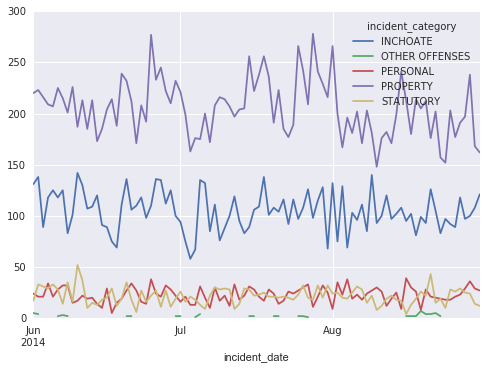

In [78]:
by_date = seattle.pivot_table('General Offense Number', aggfunc='count',
                            index='incident_date',
                            columns='incident_category' )
ax = by_date.plot()
ax.figure.savefig('figs/seattle_incidents_by_date.png', bbox_inches='tight')

### Seattle Incidents trend by weekday (By Category)

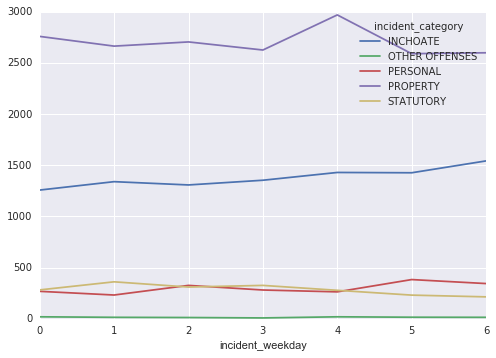

In [77]:
by_weekday = seattle.pivot_table('General Offense Number', aggfunc='count',
                            index='incident_weekday',
                            columns='incident_category')   

ax = by_weekday.plot()
ax.figure.savefig('figs/incidents_by_weekday.png', bbox_inches='tight')

### Seattle Incidents trend by hour (By Category)

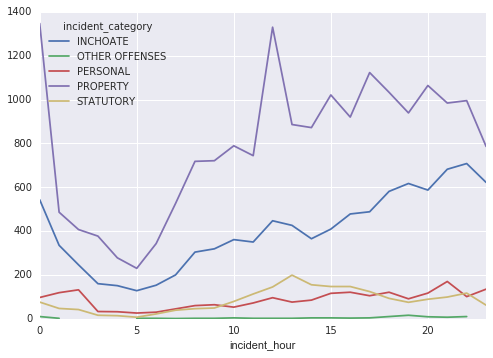

In [75]:
by_hour = seattle.pivot_table('General Offense Number', aggfunc='count',
                            index='incident_hour',
                            columns='incident_category')   
ax = by_hour.plot()
ax.figure.savefig('figs/incidents_by_hour.png', bbox_inches='tight')

### Seattle Analysis 

* In general "Property" related crimes are higher than all others. 
* The next highest category is "Inchoate" 
* There does not seem to be any specific trend in the crimes over dates or over the weekdays
* When we chart the crimes on the hours of the day, there seems to be a definite trend. Number of incidents peak at midnight and then drop as the day starts. After 5 am there is a sharp increase in incidents and it seems to peak around noon. After this peak there is a slower increase in the incident rates. 
* Most incidents span between 10am and midnight. 

### San Francisco Incidents trend by date (By Category)

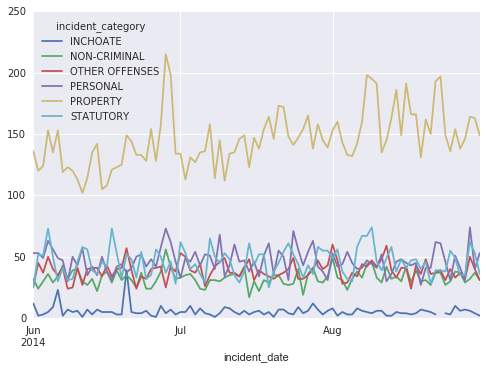

In [79]:
by_date = sanfran.pivot_table('IncidntNum', aggfunc='count',
                            index='incident_date',
                            columns='incident_category' )
ax = by_date.plot()
ax.figure.savefig('figs/sanfran_incidents_by_date.png', bbox_inches='tight')

### San Francisco Incidents trend by weekday (By Category)

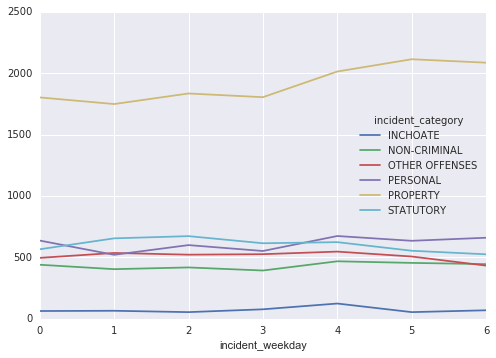

In [81]:
by_weekday = sanfran.pivot_table('IncidntNum', aggfunc='count',
                            index='incident_weekday',
                            columns='incident_category' )
ax = by_weekday.plot()
ax.figure.savefig('figs/sanfran_incidents_by_weekday.png', bbox_inches='tight')

### San Francisco Incidents trend by hour (By Category)

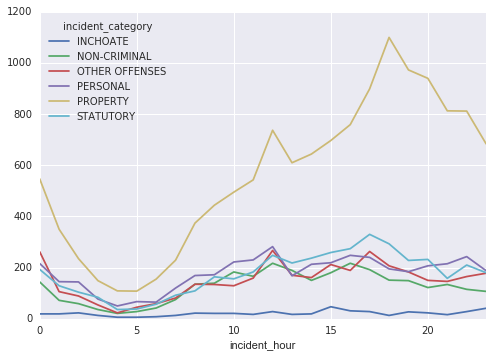

In [82]:
by_hour = sanfran.pivot_table('IncidntNum', aggfunc='count',
                            index='incident_hour',
                            columns='incident_category' )
ax = by_hour.plot()
ax.figure.savefig('figs/sanfran_incidents_by_hour.png', bbox_inches='tight')

### Analysis for San Francisco

* Most incidents are related to property
* All others fall into a general second position
* Inchoate incidents seem to be the least in San Francisco
* The hourly trend is different for San Francisco. There is an increase in incidents post 5 am and reaches a peak aroung 18:00 hours after which the rate declines until it reaches a low at 5 am. This is most evident in the property related incidents, however the trend seems to apply to the other categories.

## Conclusion

Property/Theft related incidents are highest across both states. Incident peaks at different times of the day and are highe 